# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA & Data Visualization Project</b></p>


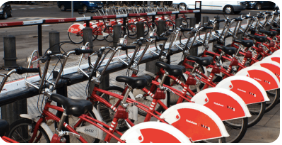

<div class="alert alert-block alert-info alert">

# <span style=" color:black">WELCOME!
## Bike Demand Visualization Project
    
 As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.<br>
    
***About Dataset:***<br>

The bike-sharing system is a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, the user is able to easily rent a bike from a particular position and return back to another position. where the whole process is from membership, rental, and return.<br>

Currently, there are about over ***500 bike-sharing programs around the world*** which are composed of over ***500 thousand bicycles.*** Today, there exists great interest in these systems due to their important role in traffic, environmental, and health issues.<br>

The bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather<br> conditions,
precipitation, day of the week, season, hour of the day, etc. can affect the rental behaviors.<br>

There have been many online sources regarding bike-sharing datasets one of which is at the UCI archive<br>

The dataset is related to the two-year historical log corresponding to the years, between January 2015 and January 2017.<br></span>


<div class="alert alert-block alert-success ">

## <span style=" color:black">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    





<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">1. Import Libraries</span>
</div>

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

import matplotlib.ticker as ticker

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bike-shares-data/bike_shares.csv


<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">2. Read Dataset</span>
</div>

In [11]:
bike_shares = pd.read_csv("/kaggle/input/bike-shares-data/bike_shares.csv")

In [12]:
bike_shares.head()

,Unnamed: 0,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_the_week,day_of_the_month,hour_of_the_day,month,year,year_month
0,0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Sunday,4,00:00,January,2015,2015-01
1,1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Sunday,4,01:00,January,2015,2015-01
2,2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Sunday,4,02:00,January,2015,2015-01
3,3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Sunday,4,03:00,January,2015,2015-01
4,4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Sunday,4,04:00,January,2015,2015-01


In [13]:
bike_shares.shape

(17414, 17)

In [14]:
bike_shares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17414 non-null  int64  
 1   timestamp         17414 non-null  object 
 2   cnt               17414 non-null  int64  
 3   t1                17414 non-null  float64
 4   t2                17414 non-null  float64
 5   hum               17414 non-null  float64
 6   wind_speed        17414 non-null  float64
 7   weather_code      17414 non-null  float64
 8   is_holiday        17414 non-null  float64
 9   is_weekend        17414 non-null  float64
 10  season            17414 non-null  float64
 11  day_of_the_week   17414 non-null  object 
 12  day_of_the_month  17414 non-null  int64  
 13  hour_of_the_day   17414 non-null  object 
 14  month             17414 non-null  object 
 15  year              17414 non-null  int64  
 16  year_month        17414 non-null  object

In [15]:
bike_shares.isnull().sum()

Unnamed: 0          0
timestamp           0
cnt                 0
t1                  0
t2                  0
hum                 0
wind_speed          0
weather_code        0
is_holiday          0
is_weekend          0
season              0
day_of_the_week     0
day_of_the_month    0
hour_of_the_day     0
month               0
year                0
year_month          0
dtype: int64

In [16]:
bike_shares.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17409    False
17410    False
17411    False
17412    False
17413    False
Length: 17414, dtype: bool

In [17]:
bike_shares.duplicated().sum()

0

# **Fortunetly there isn't any duplicated and missing values.**


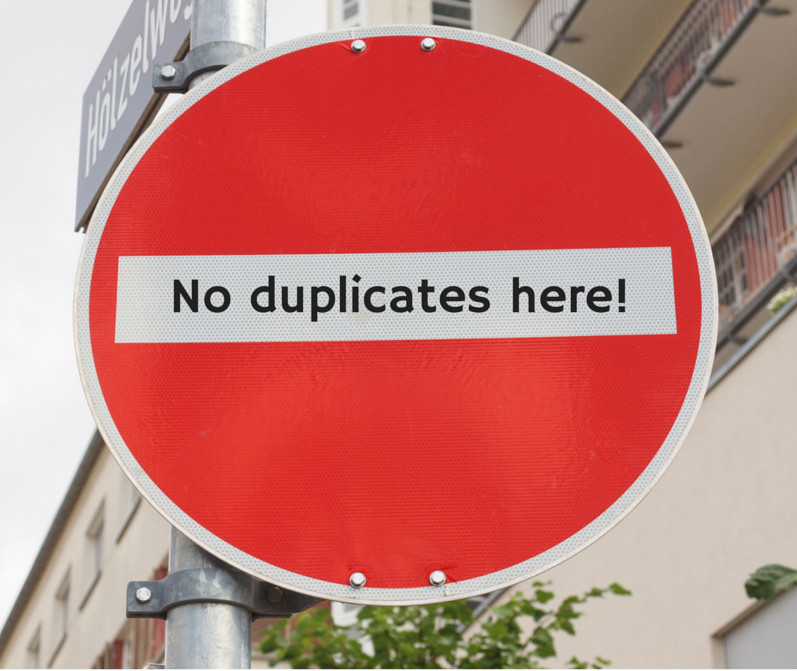

<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

</span>
</div>

In [ ]:
bike_shares.describe().T

In [ ]:
sns.color_palette()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(data=bike_shares, x="season", ax=ax[0, 0], width=0.6)
ax[0, 0].set_title("Season Distribution")
ax[0, 0].set_xlabel("Season")
ax[0, 0].set_ylabel("Count")
for p in ax[0, 0].patches:
    ax[0, 0].annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", fontsize="small")

sns.countplot(data=bike_shares, x="is_holiday", ax=ax[0, 1], width=0.4)
ax[0, 1].set_title("Holiday Distribution")
ax[0, 1].set_xlabel("Holiday")
ax[0, 1].set_ylabel("Count")
for p in ax[0, 1].patches:
    if p.get_height() > 500:
        ax[0, 1].annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", fontsize="small")
    elif p.get_height() != 0:
        ax[0, 1].annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height() + 150), ha="center", fontsize="small")

sns.countplot(data=bike_shares, x="is_weekend", width=0.4, ax=ax[1, 0])
ax[1, 0].set_title("Weekend Distribution")
ax[1, 0].set_xlabel("Weekend")
ax[1, 0].set_ylabel("Count")
for p in ax[1, 0].patches:
    if p.get_height() > 0:
        ax[1, 0].annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", fontsize="small")

sns.countplot(data=bike_shares, x="weather_code", ax=ax[1, 1])
ax[1, 1].set_title("Weather Code Distribution")
ax[1, 1].set_xlabel("Weather Code")
ax[1, 1].set_ylabel("Count")
for p in ax[1, 1].patches:
    if p.get_height() > 1000:
        ax[1, 1].annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="center", rotation="vertical", fontsize="small")
    elif p.get_height() != 0:
        ax[1, 1].annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height() + 350), ha="center", va="center", rotation="vertical", fontsize="small")

plt.tight_layout()

plt.show();


### - **Although there is not much seasonal variation, there is a higher demand in spring and summer compared to others.**
### - **The demand is higher on working days instead of holidays and weekends, which leads to the interpretation that people prefer this method of transport while commuting to work,**
### - **Generally and naturally, clear weather conditions were preferred, but it seems that there is more demand in unusual light rainy weather than in cloudy weather**

<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">5. Look at the data type of each variable, transform timestamp in type, and set it as index.</span>
</div>

In [ ]:
bike_shares.dtypes

In [ ]:
bike_shares.timestamp=pd.to_datetime(bike_shares.timestamp,errors="coerce")
bike_shares.timestamp

<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)</span>
</div>

In [ ]:
bike_shares["day_of_the_week"] = bike_shares["timestamp"].dt.day_name()
bike_shares["day_of_the_month"] = bike_shares["timestamp"].dt.day
bike_shares["hour_of_the_day"] = bike_shares["timestamp"].dt.strftime("%H:%M")
bike_shares["month"] = bike_shares["timestamp"].dt.month_name()
bike_shares["year"] = bike_shares["timestamp"].dt.year

In [ ]:
bike_shares["year_month"]=bike_shares["timestamp"].dt.strftime("%Y-%m")

In [ ]:
bike_shares.to_csv("bike_shares.csv")

In [ ]:
bike_shares_new=pd.read_csv("bike_shares.csv",index_col="timestamp")

In [ ]:
bike_shares_new.drop("Unnamed: 0",inplace=True,axis=1)

In [ ]:
bike_shares_new.sample(5)

<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">7. Visualize the correlation with a heatmap</span>
</div>

In [ ]:
sns.heatmap(data=bike_shares_new.corr(),annot=True,annot_kws={"size":7,"color":"black"},cmap="viridis")

### - **t1 (actual temperature) and t2 (perceived temperature) have the highest positive correlation with the number of bike shares.**
### - **Hum (humidity) has the highest but negative correlation, so humidity is the most important criterion that negatively affects demand.**
### - **The t1 and t2 correlations are in the same direction and close to each other, so one of them can be preferred.**

<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">8. Visualize the correlation of the target variable and the other features with barplot</span>
</div>

In [ ]:
corr_matrix=bike_shares_new.corr()
corr_matrix

### **We prefer to visualise the correlation between our target variable (cnt), i.e. bike shares, and other variables as follows**

In [ ]:
plt.figure(figsize=(10, 6))

bar_plot=sns.barplot(x=corr_matrix["cnt"].index, y=corr_matrix["cnt"].values)
plt.xticks(rotation=45)
plt.title('Hedef Değişken ile Korelasyon')
plt.xlabel('Değişkenler')
plt.ylabel('Korelasyon')

for index, value in enumerate(corr_matrix["cnt"]):
    
    bar_plot.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=8,weight="bold")

plt.show()


### - **t1 (actual temperature) and t2 (perceived temperature) have the highest positive correlation with the number of bike shares.**
### - **Hum (humidity) has the highest but negative correlation, so humidity is the most important criterion that negatively affects demand.**
### - **The t1 and t2 correlations are in the same direction and close to each other, so one of them can be preferred.** 

<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">9. Plot bike shares over time use lineplot.</span>
</div>

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.lineplot(data=bike_shares_new,x="month",y="cnt",hue="year",style="year",markers=True,palette="viridis",estimator=sum)

plt.xticks(rotation=45);

### - **As we can see from the graph, it is clear that the demand (bicycle sharing) increases with the spring months, peaks in July and then decreases.**
### - **Since the data for 2017 is only for January, we cannot see the graph very much.**

<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).</span>
</div>

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(data=bike_shares_new, x="year_month", y="cnt", estimator=sum)
plt.xticks(rotation=90);
plt.yscale("linear")

### - **Although we can see the pattern we saw in the previous graph here, we can say that there is a sharp decline in January 2017.**

In [ ]:
plt.figure(figsize=(12,4))

sns.set_style("ticks")

sns.pointplot(data=bike_shares_new, x="month", y="cnt", hue="year", estimator=sum)

plt.legend(loc="upper right")

plt.xticks(rotation=45)
plt.show();


In [ ]:
plt.figure(figsize=(12,4))

sns.barplot(data=bike_shares_new, x="month", y="cnt", hue="year", estimator=sum)

plt.xticks(rotation=45)

plt.legend(loc="upper right")

plt.show();

<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">11. Plot bike shares by hours on (holidays, weekend, season).</span>
</div>

In [ ]:
plt.figure(figsize=(10,4))
sns.set_style("darkgrid")
sns.lineplot(data=bike_shares_new,x="hour_of_the_day",y="cnt",hue="season",estimator=sum)
plt.xticks(rotation=90);

### - **It is observed that the daily change does not change much seasonally and follows similar patterns, but the numerical effect of the seasonal change shifts the graph.**

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.lineplot(data=bike_shares_new,x="hour_of_the_day",y="cnt",hue="is_holiday",estimator=sum)
plt.xticks(rotation=90);

### - **Although it is not clearly seen that there is no demand on holidays, it is also seen that it does not show any change during the day.**

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.pointplot(data=bike_shares_new,x="hour_of_the_day",y="cnt",hue="is_weekend",estimator=sum)
plt.xticks(rotation=90);

### - **Although weekends show changes during the day, it is also seen through this graph that the main demand is on working days.**
### - **On working days, it is seen that there is a fluctuation at the beginning and end of working hours.**

In [ ]:
bike_shares_new[(bike_shares_new["is_holiday"]==1) & (bike_shares_new["is_weekend"]==1)]

<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not</span>
</div>

In [ ]:
plt.figure(figsize=(12,6))
g=sns.FacetGrid(data=bike_shares_new,col="is_holiday",aspect=1.5)
g.map(sns.lineplot, "day_of_the_week", "cnt",estimator=sum)

g.set_xticklabels(rotation=45);

### **- During non-holiday periods, demand is high and approximately constant on Tuesdays, Wednesdays and Thursdays.**
### **- On holiday days, demand is lost sharply.**

<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">13. Plot bike shares by day of month</span>
</div>

In [ ]:
plt.figure (figsize=(12,6))
sns.lineplot(data=bike_shares_new,x="day_of_the_month",y="cnt",estimator=sum)
plt.show()

### - **At the end of the month, it is observed that the amount of demand decreased sharply.**

<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">14. Plot bike shares by year

- Plot bike shares on holidays by seasons</span>
</div>

In [ ]:
sns.barplot(data=bike_shares_new, x="year", y="cnt", hue="season", estimator=sum);

### - **In the graph above, it is possible to see the seasonal change on a yearly basis**

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(7,7))

sns.barplot(data=bike_shares_new, x = "is_holiday", y="cnt",estimator=sum, ax =ax[0])
sns.barplot(data=bike_shares_new, x="is_holiday", y="cnt", hue="season", estimator=sum, ax =ax[1])

plt.show();

## **Season : 0-spring ; 1-summer; 2-fall; 3-winter.**

<div class="alert alert-warning alert-info">
  <span style="color:blue; font-weight: bold">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot</span>
</div>

In [ ]:
df_pie = bike_shares_new.groupby(['is_weekend'])["cnt"].sum().reset_index()
df_pie

In [ ]:
df_pie["is_weekend"].replace({0:"weekday",1:"weekend"},inplace=True)

In [ ]:
df_pie

In [ ]:
df_pie.dtypes

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10, 8))

ax[0].pie(df_pie["cnt"], labels =df_pie["is_weekend"], labeldistance = 0.5,autopct = "%.2f",
        startangle=120,textprops={"fontsize":12})
sns.barplot(x=df_pie["is_weekend"],y=df_pie["cnt"],data=df_pie,hue="is_weekend")

plt.show()

### - **We have seen the rates on a weekend and weekday basis**

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

## - **As a result, it is seen that the demand for the transport method we define as a bicycle sharing system, especially for the most interesting and obvious insight for the examined city, is intense for commuting to work and is significantly affected by weather conditions.**

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA & Data Visualization Project</b></p>